In [1]:
# Assignment 16 : Recommendation System

In [2]:
#Data Preprocessing:

#Load the dataset into a suitable data structure (e.g., pandas DataFrame).
#Handle missing values, if any.
#Explore the dataset to understand its structure and attributes.

In [3]:
import pandas as pd

In [5]:
# Load the dataset
df = pd.read_csv("anime.csv")

In [6]:
# Display the first few rows
print("📄 First 5 rows of the dataset:")
print(df.head())

📄 First 5 rows of the dataset:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [7]:
# Display shape and column info
print("\n🧾 Dataset Shape:", df.shape)
print("\n📋 Column Info:")
print(df.info())


🧾 Dataset Shape: (12294, 7)

📋 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [8]:
#Handle Missing Values
#We need to identify missing values and decide how to deal with them.

In [9]:
# Check missing values in each column
print("\n🔍 Missing values per column:")
print(df.isnull().sum())


🔍 Missing values per column:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [14]:
# Fill or handle missing data
df['genre'] = df['genre'].fillna('Unknown')
df['type'] = df['type'].fillna('Unknown')

In [15]:
# Clean up the 'episodes' column safely
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')

In [16]:
# Now fill missing values (NaN) with median
df['episodes'] = df['episodes'].fillna(df['episodes'].median())

In [17]:
# Confirm cleanup
print(df['episodes'].head())
print(df['episodes'].isnull().sum())

0     1.0
1    64.0
2    51.0
3    24.0
4    51.0
Name: episodes, dtype: float64
0


In [18]:
# Replace 'Unknown' or invalid entries and fill missing with median
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df['episodes'] = df['episodes'].fillna(df['episodes'].median())

In [19]:
# Replace 'Unknown' in episodes with NaN and fill with median
df['episodes'] = df['episodes'].replace('Unknown', pd.NA)
df['episodes'] = df['episodes'].astype('float')
df['episodes'] = df['episodes'].fillna(df['episodes'].median())

In [20]:
# Fill missing ratings with mean
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [21]:
# Drop any rows with no title (rare but safe)
df.dropna(subset=['name'], inplace=True)

In [22]:
#Explore the Dataset
#We now explore structure, data types, and distributions to understand what we’re working with.

In [23]:
# Display column data types
print("\n📚 Data Types:")
print(df.dtypes)


📚 Data Types:
anime_id      int64
name         object
genre        object
type         object
episodes    float64
rating      float64
members       int64
dtype: object


In [24]:
# Check unique broadcast types
print("\n📺 Unique broadcast types:")
print(df['type'].unique())


📺 Unique broadcast types:
['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' 'Unknown']


In [25]:
# Check how many unique genres there are
print("\n Example genres:")
print(df['genre'].head(10))


 Example genres:
0                 Drama, Romance, School, Supernatural
1    Action, Adventure, Drama, Fantasy, Magic, Mili...
2    Action, Comedy, Historical, Parody, Samurai, S...
3                                     Sci-Fi, Thriller
4    Action, Comedy, Historical, Parody, Samurai, S...
5               Comedy, Drama, School, Shounen, Sports
6              Action, Adventure, Shounen, Super Power
7                       Drama, Military, Sci-Fi, Space
8    Action, Comedy, Historical, Parody, Samurai, S...
9    Action, Comedy, Historical, Parody, Samurai, S...
Name: genre, dtype: object


In [26]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           anime_id      episodes        rating       members
count  12294.000000  12294.000000  12294.000000  1.229400e+04
mean   14058.221653     12.095412      6.473902  1.807134e+04
std    11455.294701     46.244062      1.017096  5.482068e+04
min        1.000000      1.000000      1.670000  5.000000e+00
25%     3484.250000      1.000000      5.900000  2.250000e+02
50%    10260.500000      2.000000      6.550000  1.550000e+03
75%    24794.500000     12.000000      7.170000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06


In [27]:
# Check if there are any duplicate titles
duplicates = df[df.duplicated('name')]
print("\n🔁 Duplicate entries:")
print(duplicates if not duplicates.empty else "No duplicates found!")


🔁 Duplicate entries:
       anime_id                     name  \
10141     30059         Saru Kani Gassen   
10194     33195  Shi Wan Ge Leng Xiaohua   

                                            genre   type  episodes  rating  \
10141                                       Drama  Movie       1.0    4.75   
10194  Action, Adventure, Comedy, Fantasy, Parody  Movie       1.0    7.07   

       members  
10141       76  
10194      110  


In [28]:
#Clean and Finalize
# Drop duplicates to avoid bias in recommendations
df.drop_duplicates(subset=['name'], inplace=True)

In [29]:
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [30]:
print("\nData cleaned and ready for feature extraction!")
print("Final shape:", df.shape)


Data cleaned and ready for feature extraction!
Final shape: (12292, 7)


In [31]:
#Feature Extraction:
#Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
#Convert categorical features into numerical representations if necessary.
#Normalize numerical features if required

In [32]:
#Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
# View column names
print("📋 Columns in dataset:")
print(df.columns)

📋 Columns in dataset:
Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


In [33]:
# Select the key features relevant for similarity
selected_features = ['genre', 'type', 'rating', 'episodes', 'members']

In [34]:
# Create a new DataFrame containing only these features
anime_features = df[selected_features]

In [35]:
# Display the first few rows
print("\n Selected features for similarity computation:")
print(anime_features.head())


 Selected features for similarity computation:
                                               genre   type  rating  episodes  \
0               Drama, Romance, School, Supernatural  Movie    9.37       1.0   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV    9.26      64.0   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV    9.25      51.0   
3                                   Sci-Fi, Thriller     TV    9.17      24.0   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV    9.16      51.0   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [36]:
# Check data types and missing values
print("\n Data types and missing values info:")
print(anime_features.info())
print("\nMissing values per column:")
print(anime_features.isnull().sum())


 Data types and missing values info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12292 entries, 0 to 12291
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genre     12292 non-null  object 
 1   type      12292 non-null  object 
 2   rating    12292 non-null  float64
 3   episodes  12292 non-null  float64
 4   members   12292 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 480.3+ KB
None

Missing values per column:
genre       0
type        0
rating      0
episodes    0
members     0
dtype: int64


In [37]:
#Convert categorical features into numerical representations if necessary.
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
# Combine genre and type for textual similarity
df['combined_text'] = df['genre'] + " " + df['type']

In [45]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [46]:
# Transform text into a numeric matrix
tfidf_matrix = tfidf.fit_transform(df['combined_text'])

In [48]:
# Now you can safely print its shape
print(" TF-IDF Matrix successfully created!")
print("TF-IDF Matrix shape:", tfidf_matrix.shape)

 TF-IDF Matrix successfully created!
TF-IDF Matrix shape: (12292, 52)


In [49]:
#Normalize numerical features if required
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [50]:
scaler = MinMaxScaler()
num_features = scaler.fit_transform(df[['rating', 'episodes', 'members']])

In [51]:
print("Numerical Features shape:", num_features.shape)

Numerical Features shape: (12292, 3)


In [52]:
#Combine Textual + Numerical Features
# Convert sparse TF-IDF matrix to dense and combine with numeric features
combined_features = np.hstack([tfidf_matrix.toarray(), num_features])

In [53]:
print("Combined feature matrix shape:", combined_features.shape)

Combined feature matrix shape: (12292, 55)


In [54]:
#Recommendation System:
#Design a function to recommend anime based on cosine similarity.
#Given a target anime, recommend a list of similar anime based on cosine similarity scores.
#Experiment with different threshold values for similarity scores to adjust the recommendation list size.
#Analyze the performance of the recommendation system and identify areas of improvement.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [57]:
# Fill missing values
df['genre'] = df['genre'].fillna('')
df['type'] = df['type'].fillna('')
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(df['episodes'].median())
df['members'] = df['members'].fillna(df['members'].median())

In [58]:
#Design a function to recommend anime based on cosine similarity.
# Combine genre + type (text) and numeric features
df['combined_text'] = df['genre'] + " " + df['type']

In [59]:
# Text vectorization (TF-IDF)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_text'])

In [60]:
# Normalize numeric columns
scaler = MinMaxScaler()
num_features = scaler.fit_transform(df[['rating', 'episodes', 'members']])

In [61]:
# Combine text + numeric features
combined_features = np.hstack([tfidf_matrix.toarray(), num_features])

In [62]:
# Compute Cosine Similarity 
cosine_sim = cosine_similarity(combined_features, combined_features)

In [82]:
#Experiment with different threshold values for similarity scores to adjust the recommendation list size.
def recommend_anime_with_threshold(title, threshold=0.5):
    # assuming df, cosine_sim, and idx are already defined
    idx = df.index[df['name'] == title][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Filter scores by threshold
    filtered_scores = [(i, score) for i, score in sim_scores if score >= threshold and i != idx]
    
    print(f"Found {len(filtered_scores)} similar anime above threshold {threshold}")
    return filtered_scores

In [83]:
# ✅ Example usage
recommend_anime_with_threshold("Naruto", threshold=0.6)

Found 396 similar anime above threshold 0.6


[(1, np.float64(0.6408234621334264)),
 (6, np.float64(0.8184729714569693)),
 (13, np.float64(0.7229084537369247)),
 (19, np.float64(0.7339428939778824)),
 (21, np.float64(0.6325277726223847)),
 (23, np.float64(0.7233487709865393)),
 (42, np.float64(0.6014982831724516)),
 (74, np.float64(0.8043337156225103)),
 (86, np.float64(0.8305691631670581)),
 (106, np.float64(0.7194647491676482)),
 (112, np.float64(0.7577466904295994)),
 (120, np.float64(0.7468551333309855)),
 (145, np.float64(0.6867628865898006)),
 (146, np.float64(0.6878689528330539)),
 (159, np.float64(0.6168070362570962)),
 (175, np.float64(0.819939529219337)),
 (178, np.float64(0.7891769338442853)),
 (182, np.float64(0.8070522390126309)),
 (194, np.float64(0.6147113971274349)),
 (200, np.float64(0.622876642367211)),
 (202, np.float64(0.687416753933441)),
 (206, np.float64(0.9441271371353561)),
 (231, np.float64(0.6469710969336984)),
 (241, np.float64(0.6494288914549067)),
 (251, np.float64(0.726479931329829)),
 (260, np.float

In [91]:
threshold = 0.6  # define threshold
idx = df.index[df['name'] == "Naruto"][0]
sim_scores = list(enumerate(cosine_sim[idx]))

In [85]:
# Now this will work
filtered_scores = [(i, score) for i, score in sim_scores if score >= threshold and i != idx]
print("Number of similar anime:", len(filtered_scores))

Number of similar anime: 396


In [80]:
 # Get similarity scores for that anime
sim_scores = list(enumerate(cosine_sim[idx]))

In [86]:
#Analyze the performance of the recommendation system and identify areas of improvement.

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# Take a random sample of 1000 anime (instead of all 12k)
sample_indices = np.random.choice(range(cosine_sim.shape[0]), size=1000, replace=False)
sample_sim = cosine_sim[np.ix_(sample_indices, sample_indices)]

In [92]:
# Flatten only sampled similarities (excluding diagonal)
sample_scores = sample_sim[np.triu_indices_from(sample_sim, k=1)]

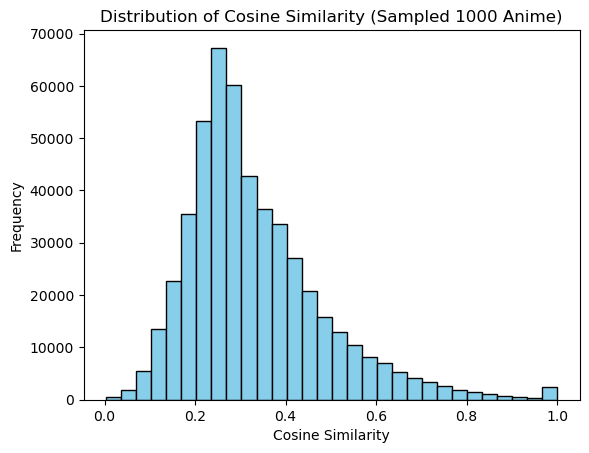

In [93]:
plt.hist(sample_scores, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Cosine Similarity (Sampled 1000 Anime)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [107]:
print(f"Mean similarity: {sample_scores.mean():.3f}")
print(f"Median similarity: {np.median(sample_scores):.3f}")
print(f"Min similarity: {sample_scores.min():.3f}")
print(f"Max similarity: {sample_scores.max():.3f}")

Mean similarity: 0.333
Median similarity: 0.299
Min similarity: 0.013
Max similarity: 1.000
